# Herc Rentals Website Analysis
An analysis of the Herc website using Jupyter Notebook

In [1]:
# install docker using https://github.com/manifoldai/docker-cookiecutter-data-science

In [2]:
# Additional libraries
!pip install xlrd
!pip install yahoofinancials
!apt-get update
!apt-get install libmagickwand-dev --fix-missing
!pip install Wand
!pip install tweepy
!pip install textblob
!pip install html5lib

You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Get:1 http://security.ubuntu.com/ubuntu xenial-security InRelease [109 kB]
Hit:2 http://archive.ubuntu.com/ubuntu xenial InRelease                     
Hit:3 http://ppa.launchpad.net/jonathonf/python-3.6/ubuntu xenial InRelease    
Get:4 http://archive.ubuntu.com/ubuntu xenial-updates InRelease [109 kB]       
Get:5 http://archive.ubuntu.com/ubuntu xenial-backports InRelease [107 kB]
Fetched 325 kB in 6s (52.9 kB/s)                                               
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libmagickwand-dev is already the newest version (8:6.8.9.9-7ubuntu5.14).
0 upgraded, 0 newly installed, 0 to remove

In [3]:
#import libraries
from yahoofinancials import YahooFinancials
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
plt.style.use('seaborn-notebook')

In [4]:
os.chdir('..')

In [5]:
excel_data = 'data/interim/company_info.xlsx'
company_info = pd.read_excel(excel_data, sheet_name='Sheet2')
company_info.head()

,Company,Public,Symbol,Exchange,Website
0,Herc Holdings Inc,1,HRI,NYSE,https://www.hercrentals.com/us.html
1,United Rentals,1,URI,NYSE,https://www.unitedrentals.com
2,Sunbelt Rentals,1,AHT,London stock exchange,https://www.sunbeltrentals.com
3,H&E Equipment Services,1,HEES,NASDAQ,https://www.he-equipment.com/


## Market Landscape

In [6]:
# Get financial data

rental_stocks = company_info['Symbol'].tolist()
yahoo_financials_rental = YahooFinancials(rental_stocks)
rental_cash_flow_data_an = yahoo_financials_rental.get_financial_stmts('annual', 'income')

dates = ['2018-12-31','2017-12-31','2016-12-31','2015-12-31']

df_list = []
for symbol in rental_stocks:
    for i in range(len(dates)):
        data = rental_cash_flow_data_an['incomeStatementHistory'][symbol][i][dates[i]]
        df = pd.DataFrame()
        df = df.append(data, ignore_index=True)
        df['symbol'] = symbol
        df['date'] = dates[i]
        df_list.append(df)

income_statements = pd.concat(df_list)
income_statements = income_statements.merge(company_info[['Symbol','Company']], how='left', left_on='symbol', right_on='Symbol')

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


,Mean Total Revenue (15-18 billions),Total Revenue 2018 (billions),Mean Net Income (15-18 millions),Net Income 2018 (millions),Mean EBIT (15-18 millions),Market Cap (millions),Market Cap %
,,,,,,,
H&E Equipment Services,1.071737,1.238961,66.9395,76.623,130.08700,957.758336,0.075
Herc Holdings Inc,1.741050,1.976700,80.2500,69.100,130.40000,1221.062016,0.096
Sunbelt Rentals,1.419379,1.428655,7.6700,-126.966,145.70475,262.504928,0.021
United Rentals,6.566750,8.047000,898.2500,1096.000,1691.00000,10258.871296,0.808


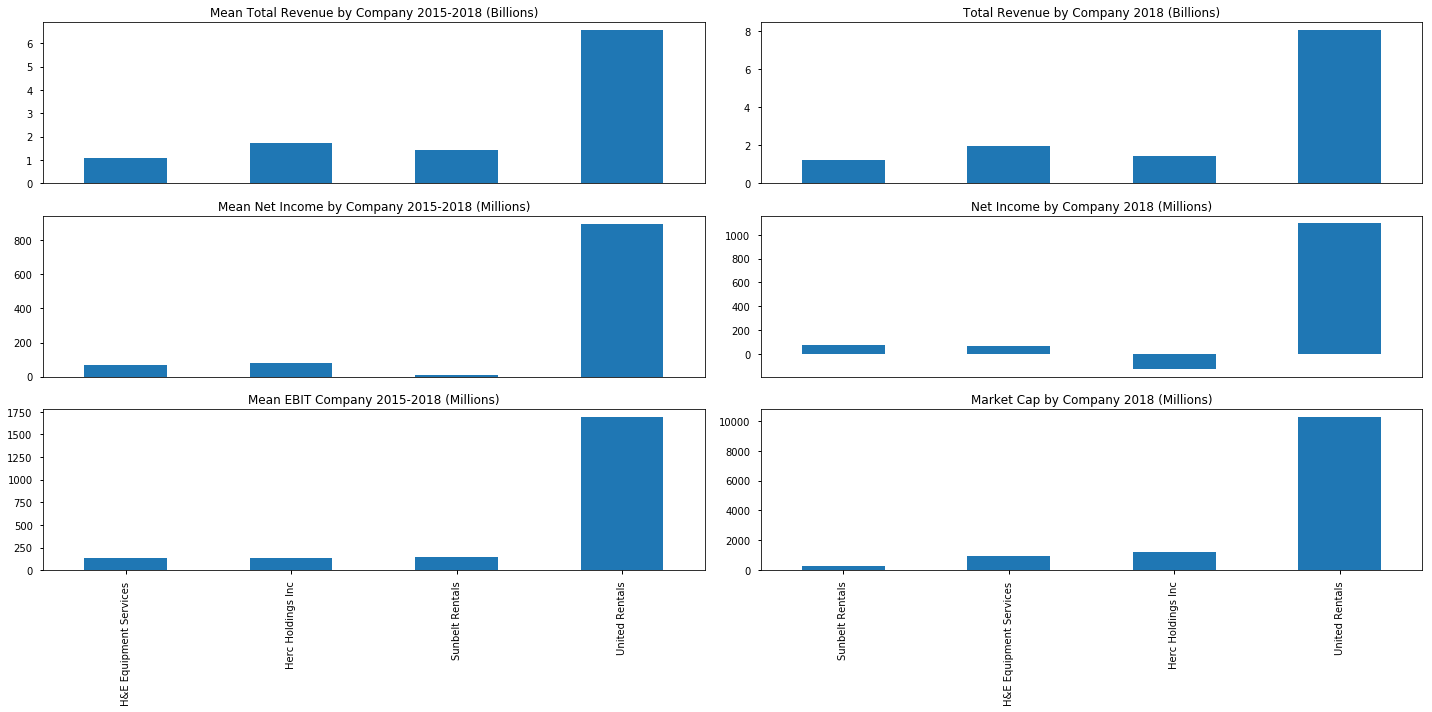

In [7]:
# View average total revenue for 2015 - 2018 and 2018 total revenue
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,10))

axes[0,0].tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
axes[0,1].tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
axes[1,0].tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
axes[1,1].tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')

totalRev_grouped = income_statements.groupby('Company')['totalRevenue'].mean().astype(float)/1000000000
totalRev_grouped = totalRev_grouped.to_frame().reset_index()
totalRev_grouped.rename(columns={'Company':'','totalRevenue':' Mean Total Revenue (15-18 billions)'}, inplace=True)
totalRev_grouped = totalRev_grouped.set_index('')
totalRev_grouped.plot(kind='bar', title='Mean Total Revenue by Company 2015-2018 (Billions)',  ax=axes[0,0], legend=False)

totalRev_2018 = income_statements[income_statements['date'] == '2018-12-31']
totalRev_2018_grouped = totalRev_2018.groupby(['Company'])['totalRevenue'].sum().astype(float)/1000000000
totalRev_2018_grouped = totalRev_2018_grouped.to_frame().reset_index()
totalRev_2018_grouped.rename(columns={'Company':'','totalRevenue':'Total Revenue 2018 (billions)'}, inplace=True)
totalRev_2018_grouped = totalRev_2018_grouped.set_index('')
totalRev_2018_grouped.plot(kind='bar', title='Total Revenue by Company 2018 (Billions)',ax=axes[0,1], legend=False)

netIncome_grouped = income_statements.groupby('Company')['netIncome'].mean().astype(float)/1000000
netIncome_grouped = netIncome_grouped.to_frame().reset_index()
netIncome_grouped.rename(columns={'Company':'','netIncome':'Mean Net Income (15-18 millions)'}, inplace=True)
netIncome_grouped = netIncome_grouped.set_index('')
netIncome_grouped.plot(kind='bar', title='Mean Net Income by Company 2015-2018 (Millions)',  ax=axes[1,0], legend=False)

netIncome_2018 = income_statements[income_statements['date'] == '2018-12-31']
netIncome_2018_grouped = netIncome_2018.groupby(['Company'])['netIncome'].sum().astype(float)/1000000.
netIncome_2018_grouped = netIncome_2018_grouped.to_frame().reset_index()
netIncome_2018_grouped.rename(columns={'Company':'','netIncome':'Net Income 2018 (millions)'}, inplace=True)
netIncome_2018_grouped = netIncome_2018_grouped.set_index('')
netIncome_2018_grouped.plot(kind='bar', title='Net Income by Company 2018 (Millions)',ax=axes[1,1], legend=False)

ebit_grouped = income_statements.groupby('Company')['ebit'].mean().astype(float)/1000000
ebit_grouped = ebit_grouped.to_frame().reset_index()
ebit_grouped.rename(columns={'Company':'','ebit':' Mean EBIT (15-18 millions)'}, inplace=True)
ebit_grouped = ebit_grouped.set_index('')
ebit_grouped.plot(kind='bar', title='Mean EBIT Company 2015-2018 (Millions)',  ax=axes[2,0], legend=False)

market_cap_df = pd.DataFrame()
market_cap_dict = yahoo_financials_rental.get_market_cap()
market_cap_df = market_cap_df.append(market_cap_dict, ignore_index=True)
market_cap_df = market_cap_df.rename(columns={'AHT':'Sunbelt Rentals', 'HEES':'H&E Equipment Services', 'HRI':'Herc Holdings Inc', 'URI':'United Rentals'})
market_cap_df = market_cap_df.transpose()
market_cap_df.rename(columns={0:"Market Cap"}, inplace=True)
market_cap_df['Market Cap'] = market_cap_df['Market Cap'].astype(float)/1000000
market_cap_df.rename(columns={'Market Cap':'Market Cap (millions)'}, inplace=True)
market_cap_df.plot(kind='bar', title='Market Cap by Company 2018 (Millions)',ax=axes[2,1], legend=False)

joined1 = totalRev_grouped.merge(totalRev_2018_grouped, how='left', left_index=True, right_index=True)
joined1 = joined1.merge(netIncome_grouped, how='left', left_index=True, right_index=True)
joined1 = joined1.merge(netIncome_2018_grouped, how='left', left_index=True, right_index=True)
joined1 = joined1.merge(ebit_grouped, how='left', left_index=True, right_index=True)
joined1 = joined1.merge(market_cap_df, how='left', left_index=True, right_index=True)
joined1['Market Cap %'] = round(joined1['Market Cap (millions)'] / joined1['Market Cap (millions)'].sum(),3)


plt.tight_layout()
display(joined1)

**Analysis**

Looking at Herc compeitors to get a broad overview of its competitors total revenue and net income. United Rentals is market leader in total revenue and net income by a substantial margin of billions and millions of dollars. While Herc and Sunbelt Rentals seem to be more evenly matched in revenue. Intersting that Herc has a total revenue of \\$1.98 billion and Sunbelt Rentals has total revenue of \\$1.42 billion, but Herc's net revenue is substationally different than Sunbelt Rental's (\\$196 million). Sunbelt Rental had a net revenue of negative -\\$126 million while Herc had a positive net revenue of \+\\$69 million. H&E Equipment Services is a close 4th place in total revenue with Sunbelt Rentals (difference of \\$189 thousand), but actually second place in net revenue ahead of Sunbelt Rentals and Herc. It would be interesting to understand why Sunbelt Rental has such a negative net income compared to its peers. Also interesting to understand how H&E Rentals seems to have lower total incom than all four, but, has the second best net income. It seems that Herc can be more evenly compared to to Sunbelt Rentals and H&E Equipment Services than United Rentals.

## Website Traffic Landscape
Since I don't have access to the actual website data, the best I could do is get data from SimilarWeb. I had to save a PDF file and convert the PDF to PNG to output specific pages for viewing. I could not extract the data into a Excel or CSV for importing. An image is the best I could do for now.

### Competitor Traific and Engagement Analysis

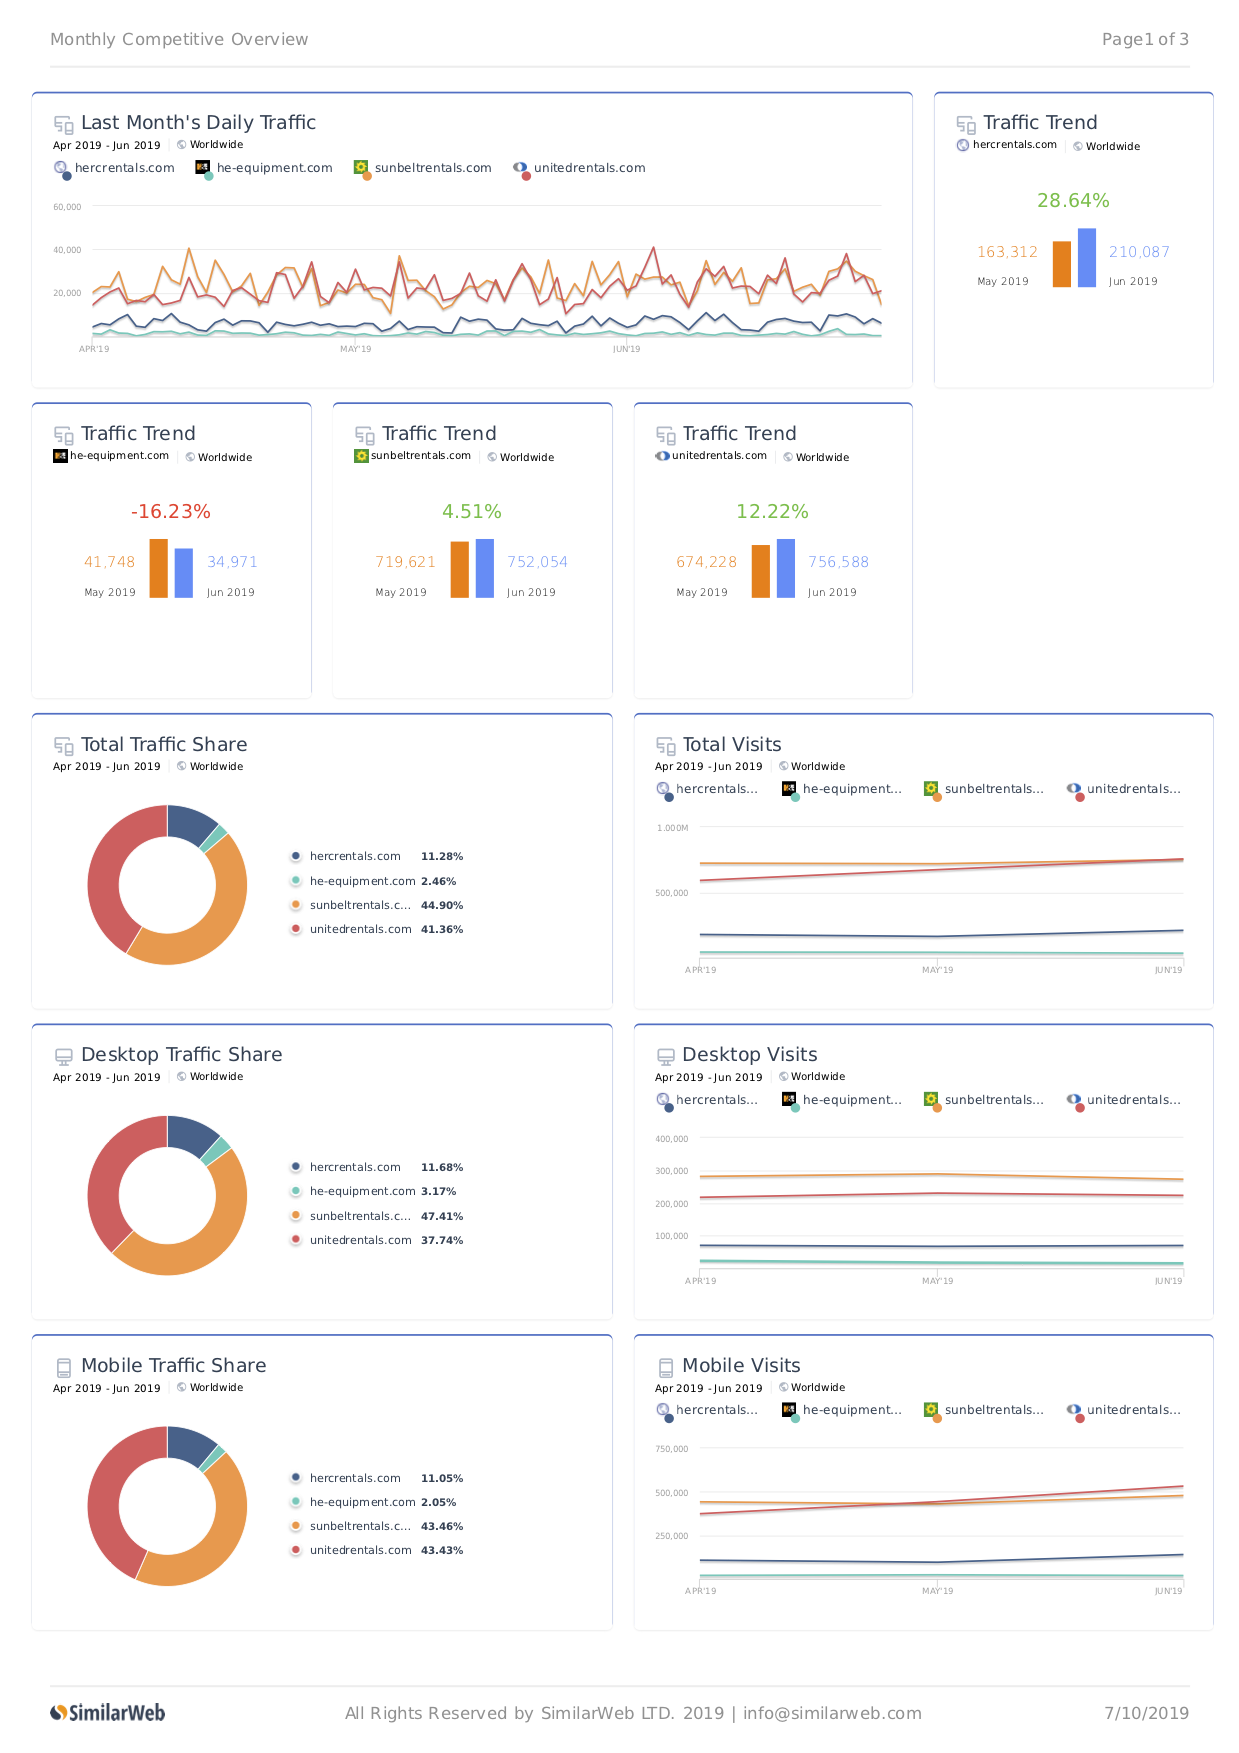

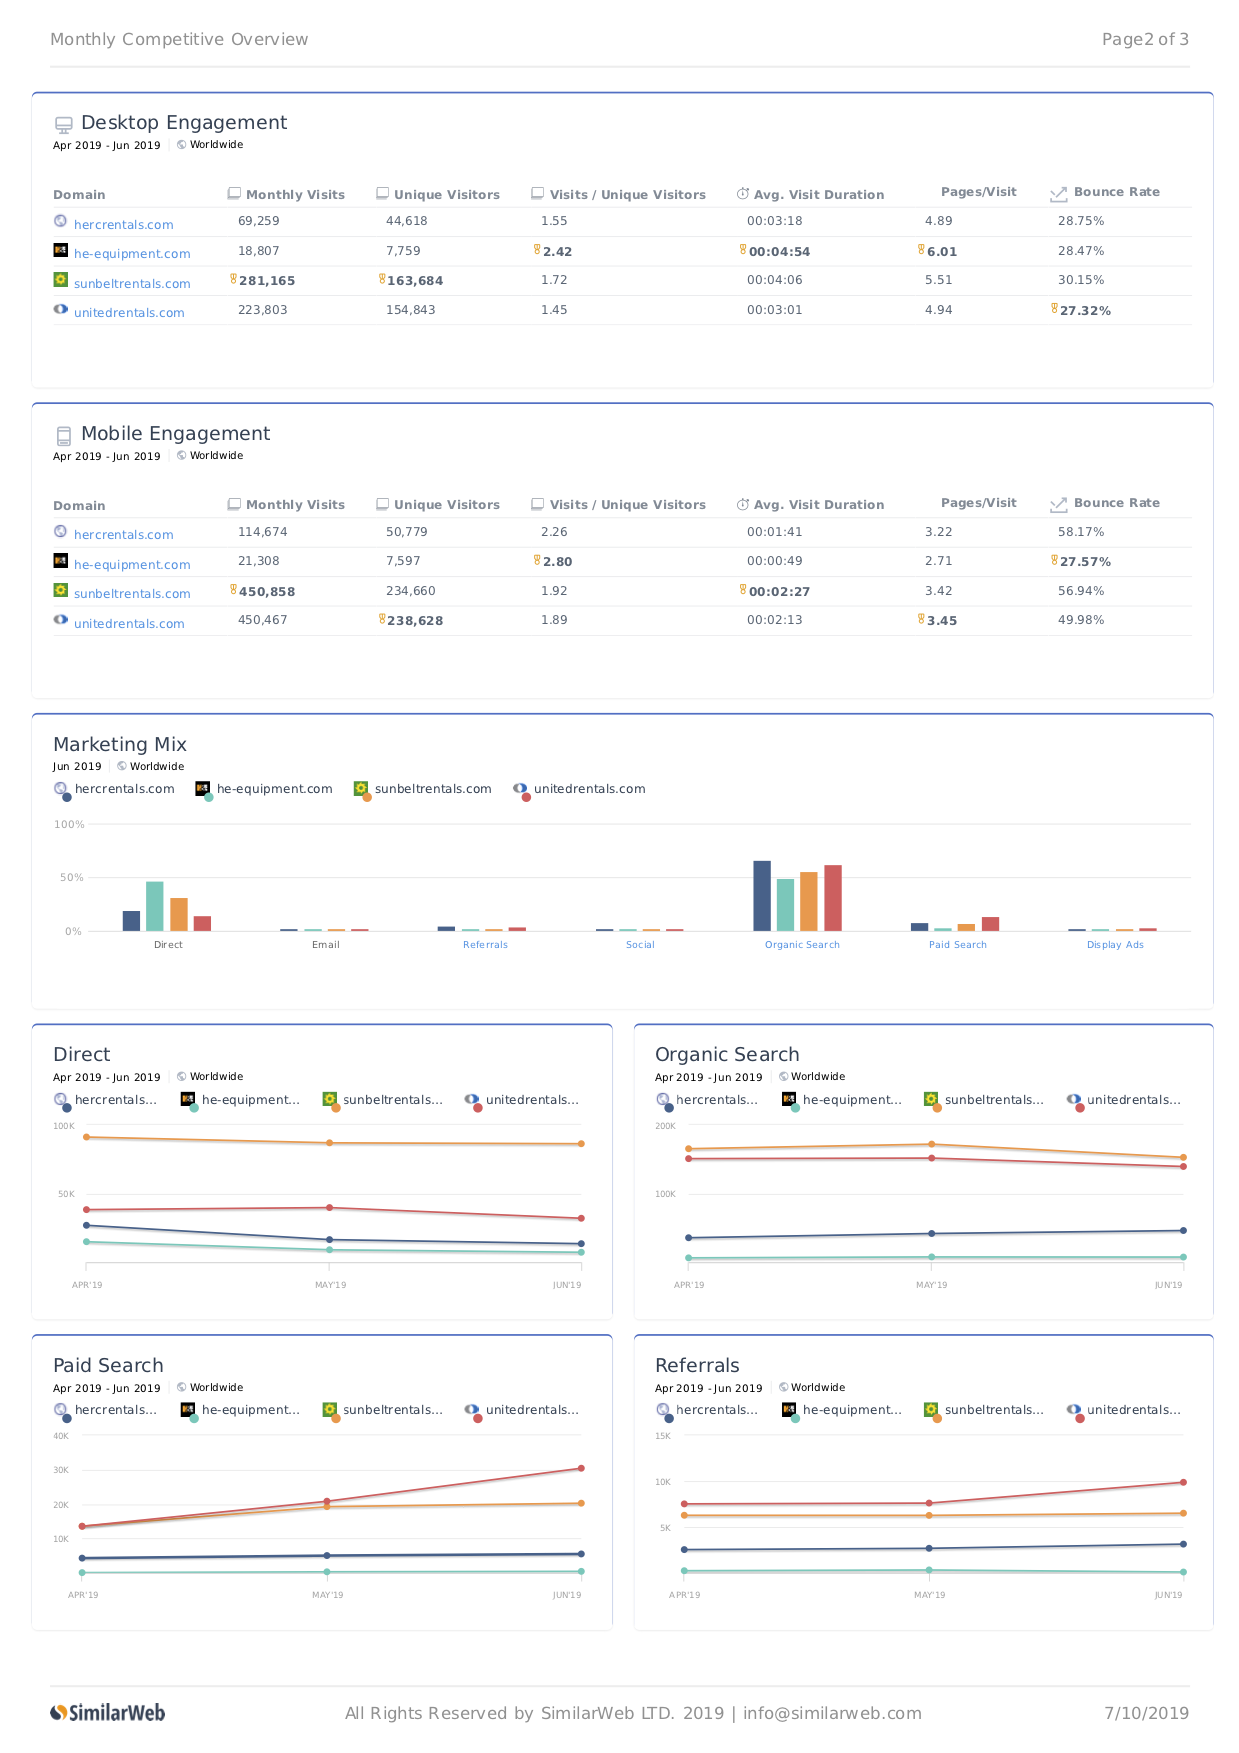

In [8]:
from wand.image import Image as WImage
traffic_img = WImage(filename='data/interim/2_Monthly_Competitive_Overview.July_2019.png')
engagement_img = WImage(filename='data/interim/3_Monthly_Competitive_Overview.July_2019.png')
display(traffic_img)
display(engagement_img)

In [9]:
mobile_unique = [50779, 7597, 234660, 238628]
desktop_unique = [44618, 7759, 163684, 154843]
columns_list = ['unique mobile visits', 'unique desktop visits']
index_list = ['Herc','H&E','Sunbelt','United']

unique_visits_df = pd.DataFrame(index=index_list, columns=columns_list)
unique_visits_df['unique mobile visits'] = mobile_unique
unique_visits_df['unique desktop visits'] = desktop_unique
unique_visits_df['total unique visits'] = unique_visits_df['unique mobile visits'] + unique_visits_df['unique desktop visits']
unique_visits_df['% unique mobile'] = round(unique_visits_df['unique mobile visits'] / unique_visits_df['total unique visits'],2)
unique_visits_df['% unique deskop'] = round(unique_visits_df['unique desktop visits'] / unique_visits_df['total unique visits'],2)
unique_visits_df['% diff'] = unique_visits_df['% unique mobile'] - unique_visits_df['% unique deskop']

print("Breakdown of Unique Visits")
display(unique_visits_df)

Breakdown of Unique Visits


,unique mobile visits,unique desktop visits,total unique visits,% unique mobile,% unique deskop,% diff
Herc,50779,44618,95397,0.53,0.47,0.06
H&E,7597,7759,15356,0.49,0.51,-0.02
Sunbelt,234660,163684,398344,0.59,0.41,0.18
United,238628,154843,393471,0.61,0.39,0.22


**Analysis**

One of the biggest problems I see for Herc is that even though Sunbelt Rental's has 2% of the market capitalization, they have 44.90% of total online traffic between all four competitors. Even beating out United Rentals which has an 81% of the market captialization. Except for H&E Equipment (-2%), Herc (6%), Sunbelt (18%) and United (22%) have more unique traffic coming in from mobile engagement than desktop engagement. H&E at this time does not have Apple or Android app which is most likely accounting for the lack of mobile engagement. Unique visitors usually cost the most to attain so they are important. One of the major differences between Herc is that that Sunbelt proportionally has 3x more of unique mobile visitors than desktop vistors compared to Herc. Sunbelt seems to maximizing its online presence the most. While market share might be a lagging indicator, online traffic could be a more shore term indicator of general market trends. If this the case, then Sunbelt is in a good position with its online traffic to gain market share. 

On the search side, Herc is the leader in organic search. That is a huge strength to acheive unique visitors without paying for them on a case-by-case basis as with paid search. It means the search engine optimization is doing well. On the other hand, the Herc's social marketing leads is rather low. This may be due to the culture of the clients not having much of a social presence or just the right campaign has not been implemented yet.


### Hompage Design Analysis

Mobile Landing Pages


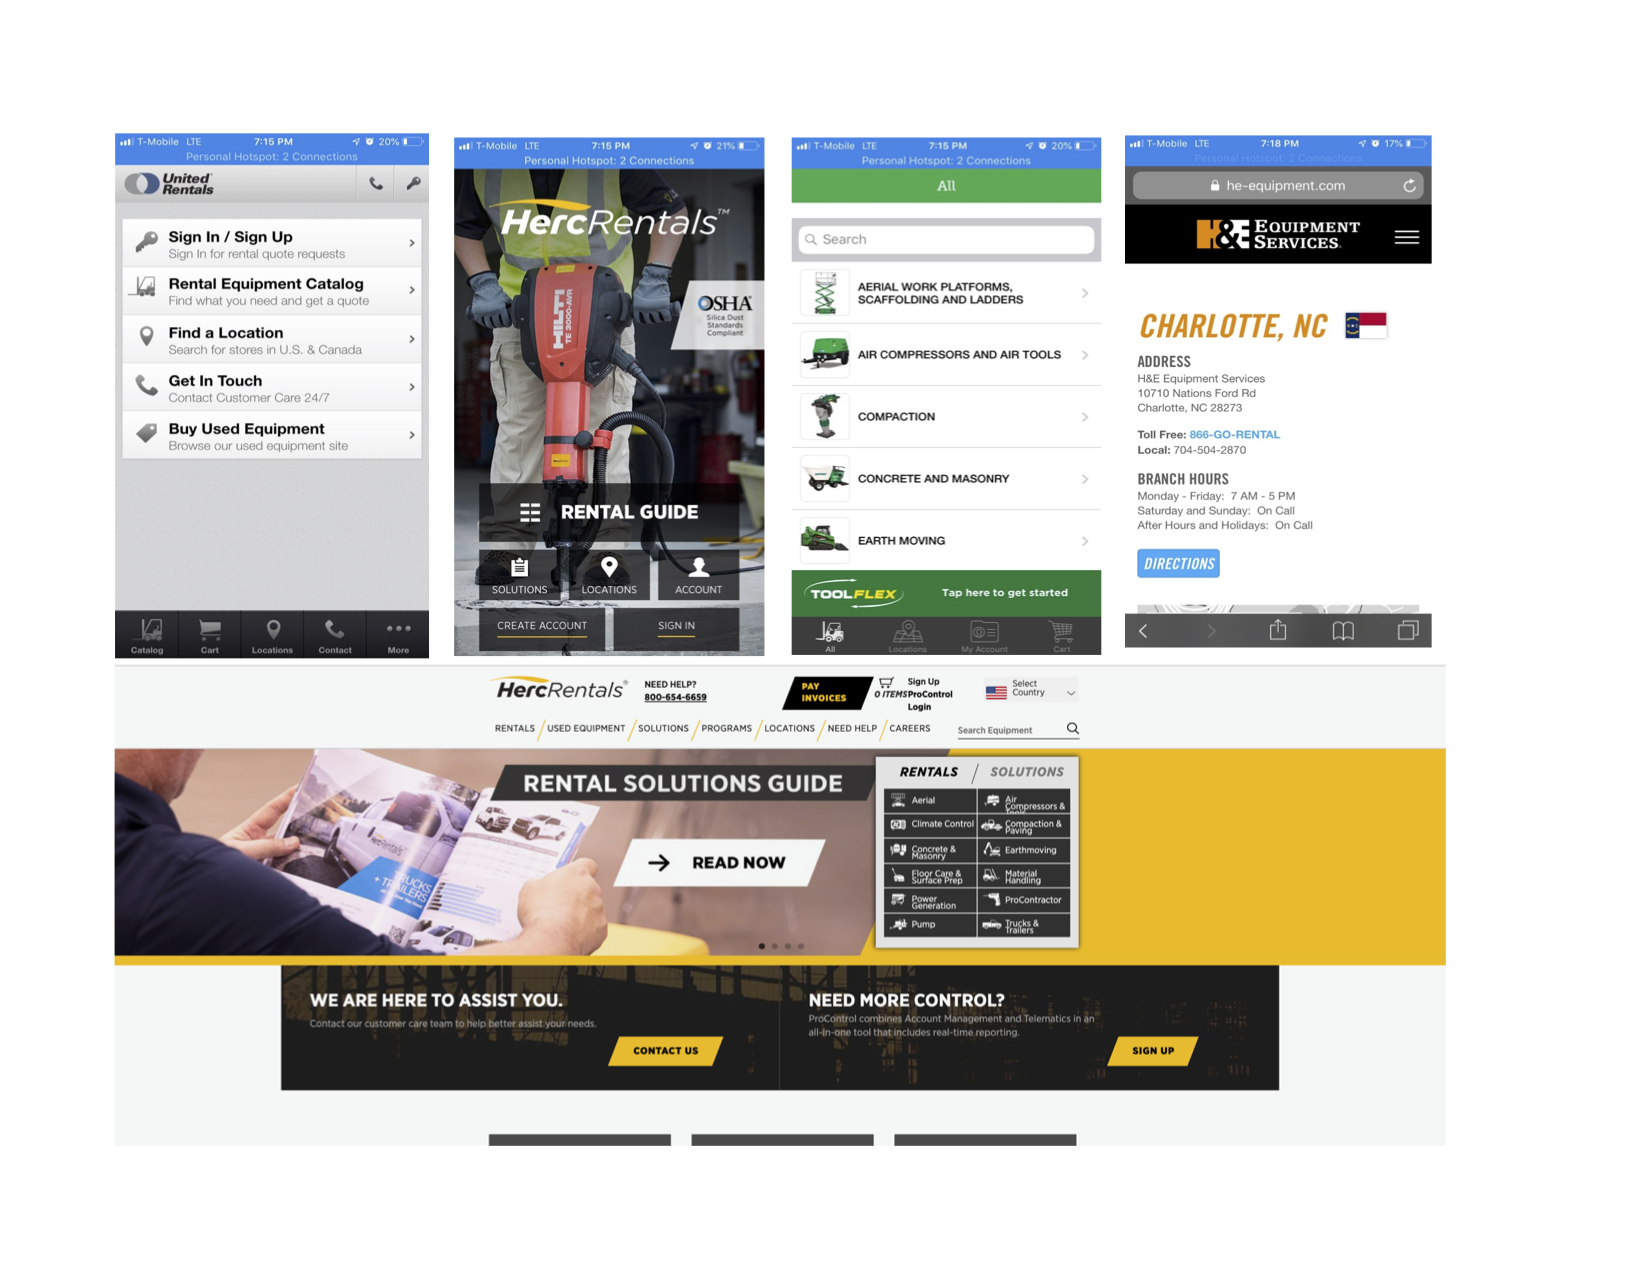

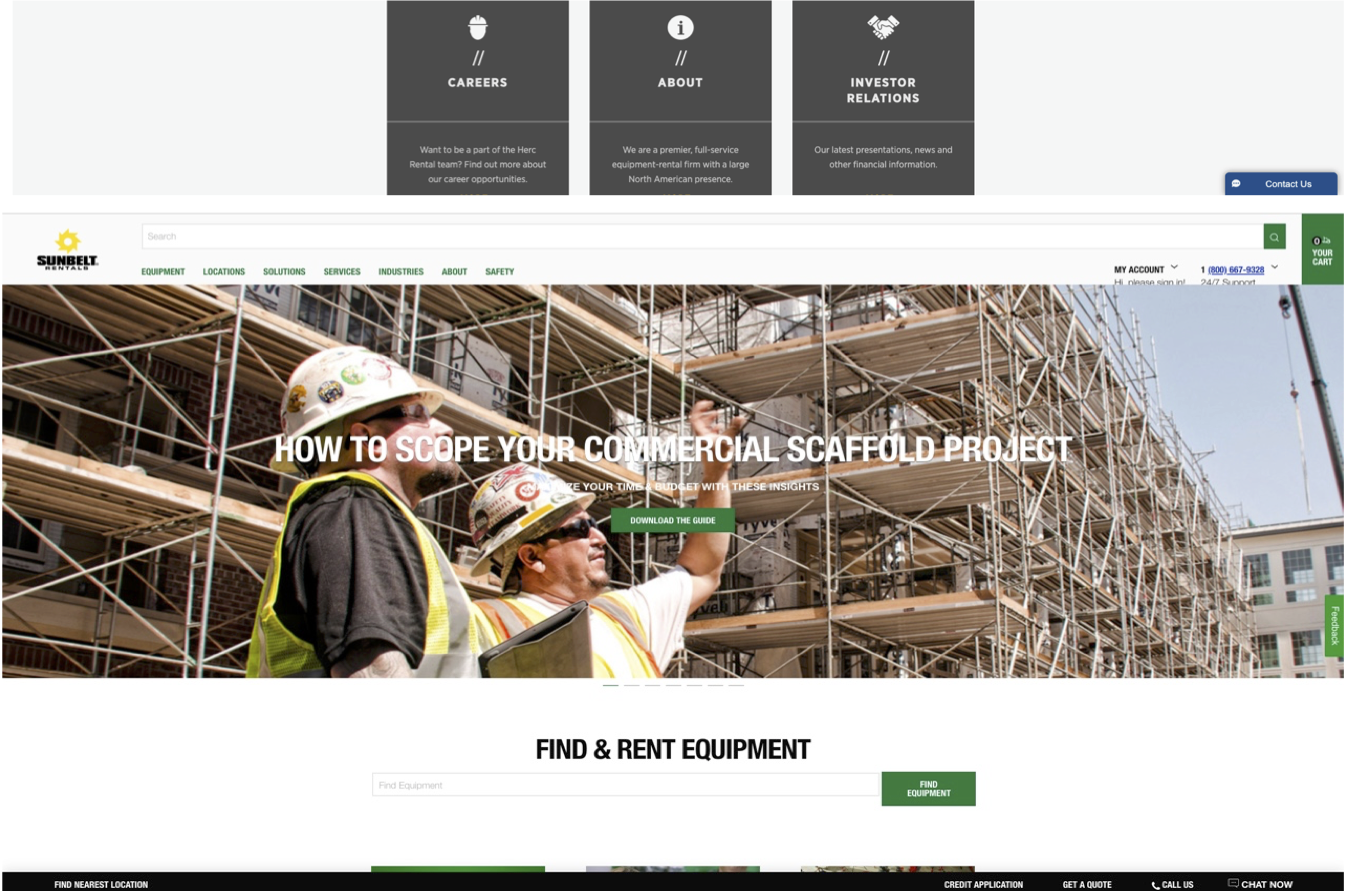

In [16]:
mobiles_img_1 = WImage(filename='data/interim/1_images_table.png')
mobiles_img_2 = WImage(filename='data/interim/2_images_table.png')
print("Mobile Landing Pages")
display(mobiles_img_1)
display(mobiles_img_2)

**Analysis**

The biggest differnce I see between the leader of desktop and mobile engagement Sunbelt and Herc is that that Sunbelt provides two things on their landing pages:
1. An easy to find search form
2. New content to engage the user and add value beyond the rental service

On the first page of Sunbelt they have two search forms. One at the top of the page and one at the bottom of the landing page. This probably makes it easier to find the specific rental equipment they are looking for without clicking through a menu. The second is while Herc does have some content to engage the user besides purchasing rental equipment, it is nowhere near the level Sunbelt has. Herc has one Rental Solutions Guide compared to about five for Sunbelt. Sunbelt is also positioning itself and branding itself better by telling a story of who they are and what they. They are not just a rental equipment company. They are your friend trying to help.

### Homepage Performance Analysis
Usinge sitespeed.io I compared the peformance of landing pages on a chrome desktop browers. 

In [28]:
%%html


<iframe src="file:///Users/amelton/rental_analysis/data/external/2019-07-10-17-42-28/index.html width="1200" height="1000"></iframe>


In [29]:
from IPython.display import HTML
display(HTML(filename='data/external/2019-07-10-17-42-28/index.html'))

### Twitter Sentitment Analysis
Since no group has a strong online presence I thought it would be interesting to do a Twitter sentiment analysis of the Herc brand.

In [ ]:
import tweepy
from textblob import TextBlob

consumer_key = '[consumer_key]’
consumer_key_secret = ‘[consumer_key_secret]’
access_token = ‘[access_token]’
access_token_secret = ‘[access_token_secret]’

In [ ]:
auth = tweepy.OAuthHandler(consumer_key, consumer_key_secret)
auth.set_access_token(access_token, access_token_secret)
